<a href="https://colab.research.google.com/github/sudhanshumukherjeexx/MTH-522/blob/main/MTH_522__Assignment_1__Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Download the Washington Post database of US police shootings. Which of the following techniques might be useful in addressing questions arising from this data set?**
* classification

* regression

* cluster analysis

**Link for the Washington Post Database of US Police Shootings** - [View Article](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/) [Download Dataset](https://github.com/washingtonpost/data-police-shootings)

> Before I start working my way around this question, I would like to give credit to few resources available online which helped me have a better perspective on the discussion of this sensitive topic. 

> I'm also fairly new to R Programming and Thanks to Dr. Gary Davis for allowing to let us work in python. However I wanted to learn R prograaming and I have taken alot of help from youtube in learning Basics of R Programming. 

> You can find link of all the helpful resources below :

## Washington Post released a database in which they recorded every fatal shooting in United States by police officer in line of duty since January 1 2015.

The Dataset `fatal-police-shootings-data.csv` is in the csv format and contains following `variables`.

1. `id` - unique identifier of each victim.
2. `name` - name of the person who got shot.
3. `date` - Date of shooting in YYYY-MM-DD format.
4. `manner_of_death` - This field tells us the way person was killed and only has two values (a) Shot and (b) Shot and Tasered.
5. `Armed` - It tells us the nature of victim whether they were armed, unarmed or unknown. According to [washington post official Github account](https://github.com/washingtonpost/data-police-shootings/blob/master/README.md)

  * `undetermined`: it is not known whether or not the victim had a weapon

  * `unknown`: the victim was armed, but it is not known what the object was

  * `unarmed`: the victim was not armed
6. `Age` - defines the age of a person shot.
7. `Gender` - Gender of a person Male or Female or Unknown in some cases.
8. `Race` - Race defines the race of person shot where
  *  W: White, non-Hispanic
  *  B: Black, non-Hispanic
  *  A: Asian
  *  N: Native American
  *  H: Hispanic
  *  O: Other
  *  None: unknown
9. `City` - The municipality where shooting happened and in some cases nearest county is listed.
10. `State` - Name of the satate where it happened.
11. `Signs of Mental illness` - Whether the victim had Mental Illness during the time period when shooting happened. True or False.
12. `threat_level`: According to [washington post official Github account](https://github.com/washingtonpost/data-police-shootings/blob/master/README.md) The threat_level column was used to flag incidents for the story by Amy Brittain in October 2015. http://www.washingtonpost.com/sf/investigative/2015/10/24/on-duty-under-fire/ As described in the story, the general criteria for the attack label was that there was the most direct and immediate threat to life. That would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats.
13. `Flee` - Whether the victim was trying to flee from officer using
    * Car.
    * Foot.
    * Not Fleeing.
14. `body_camera` - Indiactes that whether the officer was wearing a body cam or not.
15. `latitude and longitude`: According to [washington post official Github account](https://github.com/washingtonpost/data-police-shootings/blob/master/README.md)`latitude and longitude` is the location of the shooting expressed as WGS84 coordinates, geocoded from addresses. The coordinates are rounded to 3 decimal places, meaning they have a precision of about 80-100 meters within the contiguous U.S.

16. `is_geocoding_exact`: According to [washington post official Github account](https://github.com/washingtonpost/data-police-shootings/blob/master/README.md) `is_geocoding_exact` reflects the accuracy of the coordinates. true means that the coordinates are for the location of the shooting (within approximately 100 meters), while false means that coordinates are for the centroid of a larger region, such as the city or county where the shooting happened.


# Answer
* The question demands a conclusion on which technique (Regression, Classification, Clustering) would be helpful in addressing the question arising from this dataset.

* Although, before concluding that, Let's perform Exploratory Data Analysis on the Data set to have a better understanding of the dataset and also it will eventually help to figure out which technique will suit the best.

# Using R in python environment.

We can simply visit this link with a language parameter and use directly [Link](https://colab.research.google.com/#create=true&language=r)

# Library and R setting 


In [163]:
library(tidyverse)  # A widdely used R Library for Visualization and Manipulation
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 200) # Setting R environment for Plot height, width and resolution

# Loading Dataset

In [108]:
data <- read.csv('/content/fatal-police-shootings-data.csv')   #load the file and save it to the variable data

# Understand the Structure of the data

It will help us observe the different predictors available to us

In [109]:
str(data)

'data.frame':	7729 obs. of  17 variables:
 $ id                     : int  3 4 5 8 9 11 13 15 16 17 ...
 $ name                   : chr  "Tim Elliot" "Lewis Lee Lembke" "John Paul Quintero" "Matthew Hoffman" ...
 $ date                   : chr  "2015-01-02" "2015-01-02" "2015-01-03" "2015-01-04" ...
 $ manner_of_death        : chr  "shot" "shot" "shot and Tasered" "shot" ...
 $ armed                  : chr  "gun" "gun" "unarmed" "toy weapon" ...
 $ age                    : int  53 47 23 32 39 18 22 35 34 47 ...
 $ gender                 : chr  "M" "M" "M" "M" ...
 $ race                   : chr  "A" "W" "H" "W" ...
 $ city                   : chr  "Shelton" "Aloha" "Wichita" "San Francisco" ...
 $ state                  : chr  "WA" "OR" "KS" "CA" ...
 $ signs_of_mental_illness: chr  "True" "False" "False" "True" ...
 $ threat_level           : chr  "attack" "attack" "other" "attack" ...
 $ flee                   : chr  "Not fleeing" "Not fleeing" "Not fleeing" "Not fleeing" ...
 $ body

> If we observe the above output then we can notice that we have 13 CHARACTER value, 2 INTEGER values (`id` and `age`) and 2 NUMERICAL values (`longitude` and `latitude`)

> Looking at the structure of the data, we can expect that we won't be using Regression analysis as the integer value consist only `id` and `age` and rest `longitude` and `latitude` which is mostly used for confirming the geo location when shooting happened. Therefore, we can state that We won't be using the Regression in this Dataset.

# Top 5 Values of Data

In [110]:
head(data,5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,3,Tim Elliot,2015-01-02,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
2,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
3,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
4,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
5,9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


# Check for missing values and Count all the missing values in entire dataframe.

In [111]:
sapply(data, function(x) sum(is.na(x))) 

id                    name                    date 
                      0                       0                       0 
        manner_of_death                   armed                     age 
                      0                       0                     482 
                 gender                    race                    city 
                      0                       0                       0 
                  state signs_of_mental_illness            threat_level 
                      0                       0                       0 
                   flee             body_camera               longitude 
                      0                       0                       0 
               latitude      is_geocoding_exact 
                      0                       0

> We can Observe from the above values that the `age` has 482 missing values. We can try to remove these missing values and replace it with a mean age. Although age is crucial criteria in determining the number of people killed in a particular age group.

> `Longitude and Latitude` has 837 missing values each, these values are used to determine the exact geolocation of the person where he/she was shot. Even if we are trying to know the state or municipality wise data of people killed, we can work our way around other available column such as `city` or `state`. 

> We won't be handling missing values of `longitude` and `latitude` as that would make no sense replacing them with any random numbers. 

# Replacing missing values in `age` column

In [112]:
data$age[is.na(data$age)] = mean(data$age, na.rm=TRUE)

sapply(data, function(x) sum(is.na(x)))

id                    name                    date 
                      0                       0                       0 
        manner_of_death                   armed                     age 
                      0                       0                       0 
                 gender                    race                    city 
                      0                       0                       0 
                  state signs_of_mental_illness            threat_level 
                      0                       0                       0 
                   flee             body_camera               longitude 
                      0                       0                       0 
               latitude      is_geocoding_exact 
                      0                       0

In [113]:
head(data)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,3,Tim Elliot,2015-01-02,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
2,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
3,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
4,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
5,9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
6,11,Kenneth Joe Brown,2015-01-04,shot,gun,18,M,W,Guthrie,OK,False,attack,Not fleeing,False,-97.423,35.877,True


# Summary of the data

In [114]:
summary(data)

       id           name               date           manner_of_death   
 Min.   :   3   Length:7729        Length:7729        Length:7729       
 1st Qu.:2167   Class :character   Class :character   Class :character  
 Median :4293   Mode  :character   Mode  :character   Mode  :character  
 Mean   :4268                                                           
 3rd Qu.:6358                                                           
 Max.   :8406                                                           
    armed                age           gender              race          
 Length:7729        Min.   : 2.00   Length:7729        Length:7729       
 Class :character   1st Qu.:28.00   Class :character   Class :character  
 Mode  :character   Median :36.00   Mode  :character   Mode  :character  
                    Mean   :37.18                                        
                    3rd Qu.:45.00                                        
                    Max.   :92.00            

# People killed based on their gender

In [115]:
df <- data.frame(data)

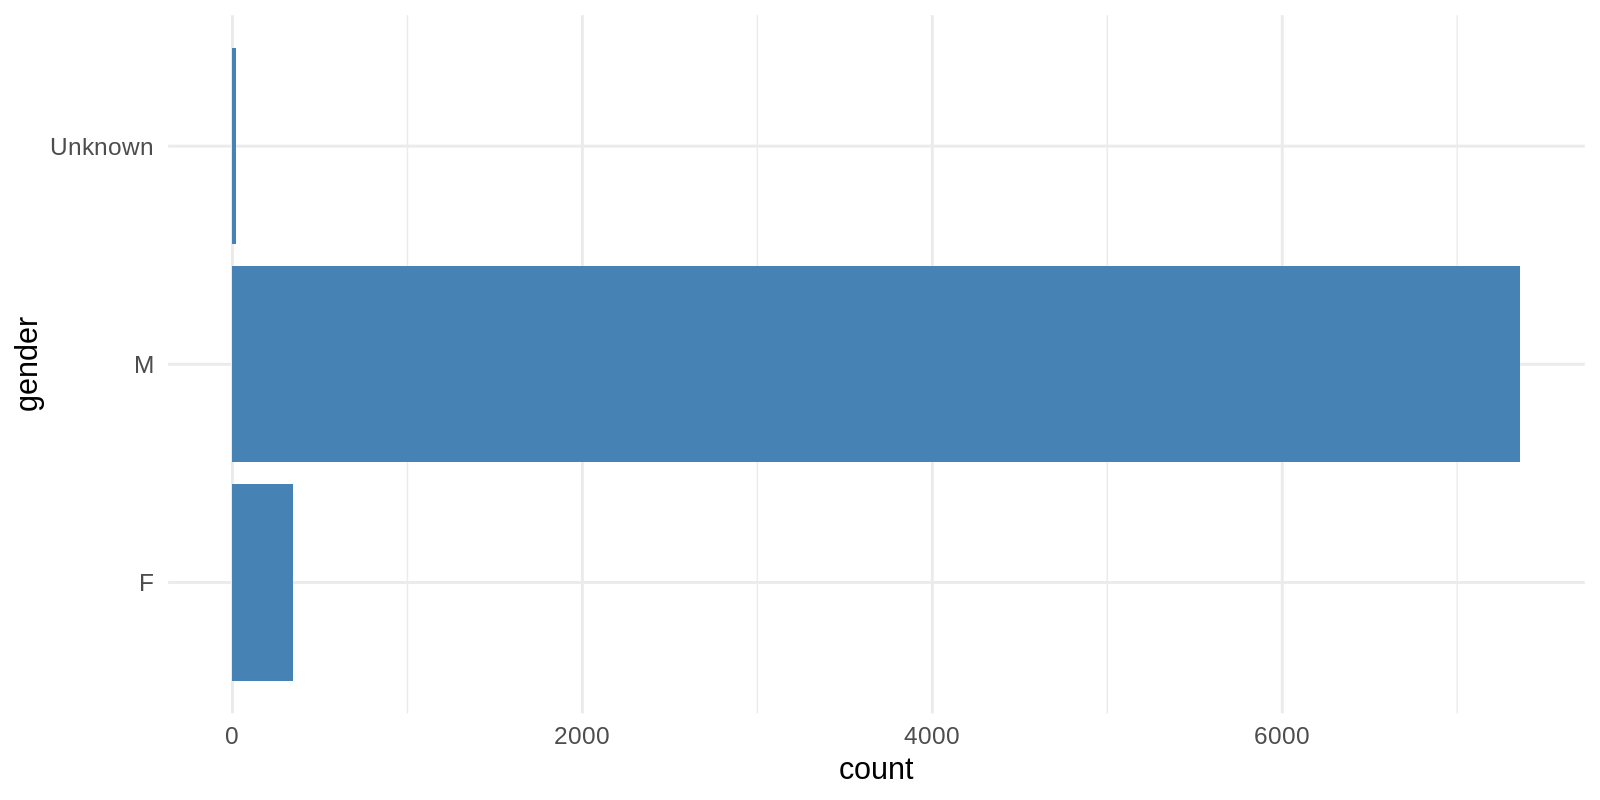

In [164]:
p1 <- ggplot(df, aes(y = gender))+
  geom_bar(fill="steelblue")+
  theme_minimal()
p1

> If we look at the bar plot above then we can clearly understand that Number of male victims are way higher than female victims

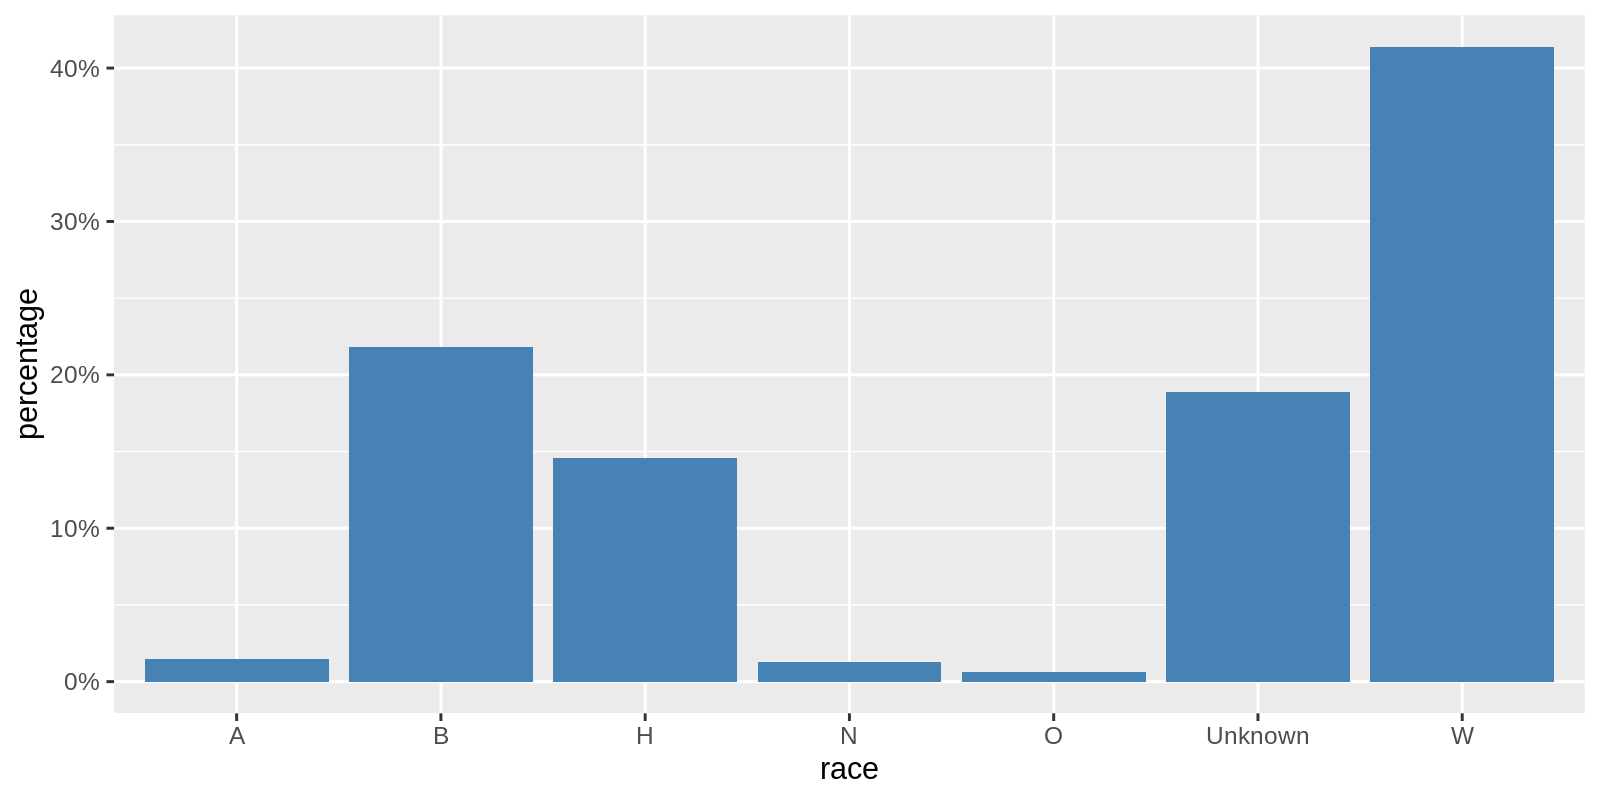

In [147]:
p2 <- ggplot(df, aes(race)) + 
          geom_bar(aes(y = (..count..)/sum(..count..)), fill="steelblue") + 
          scale_y_continuous(labels=scales::percent) +
  ylab("percentage")

p2

> The above bar plot suggests that:

  * Race is unknown of around 18-19% people.
  * White,Non Hispanic people killed account for around 41%
  * Black People acccount for 21-23%
  * Hispanic people account for less than 15%
  * Asian people killed account for 1% similar to Native Americans. 

# People who showed Signs of Mental illness with respect to their race.
- True : Had Mental Illness.
- False : No Mental Illness Present.

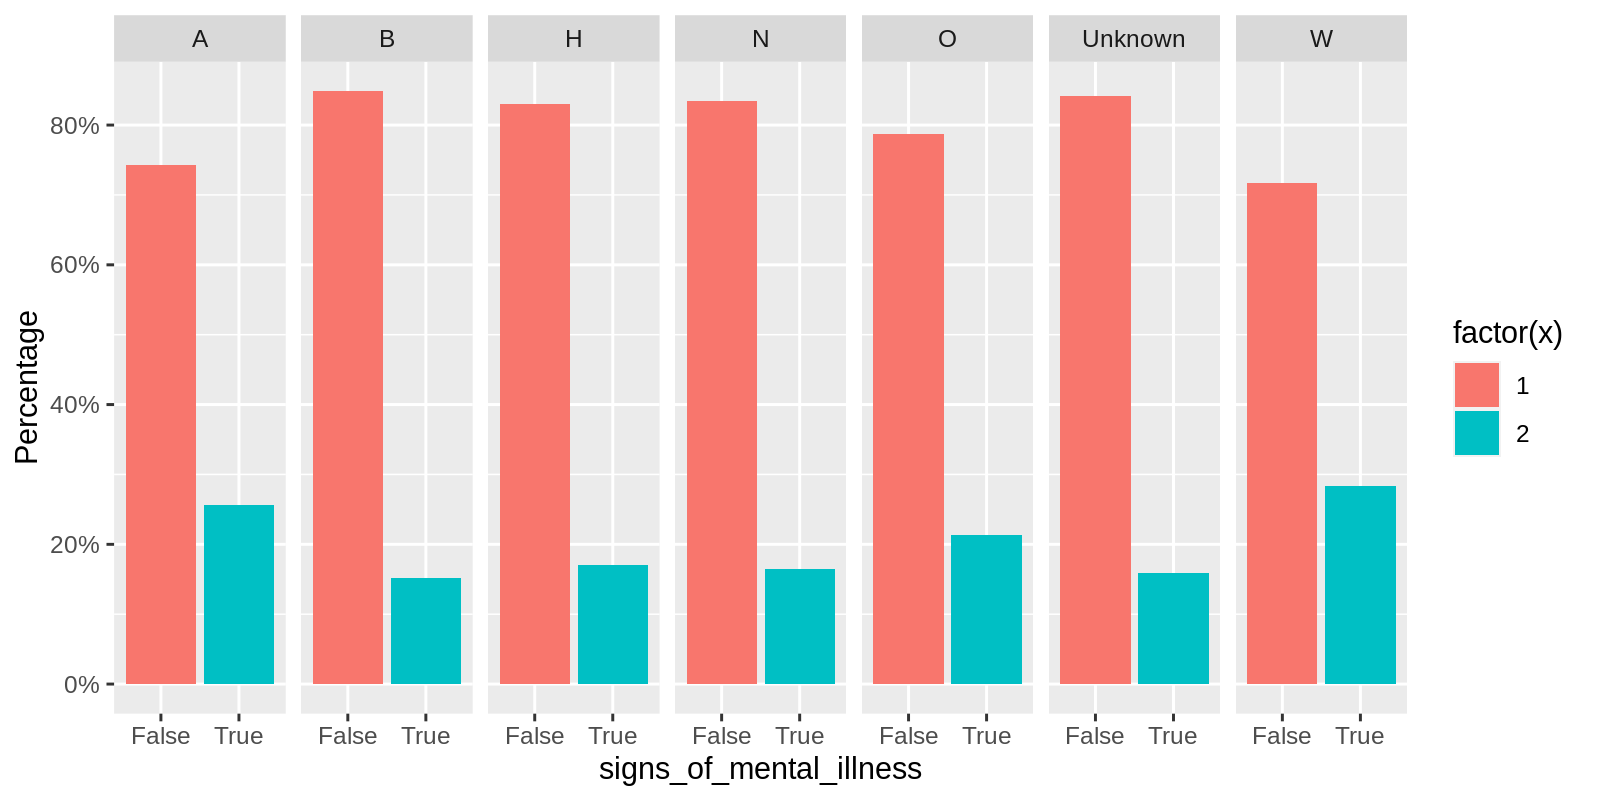

In [148]:
p3 <- ggplot(df, aes(signs_of_mental_illness, group = race)) + 
          geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") + 
          scale_y_continuous(labels=scales::percent) +
          ylab("Percentage") +
          facet_grid(~race)

p3

> If we observe the above graph, we can state that Out of all the people killed, Mental Illness found in White and Asians is almost same, just around 22-24%.

> Victims who were Black, Hispanic and Native Americans had mental illness just around 17-18% 

# Creating Age Group for all the Victims

In [151]:
df$AgeGroup <- cut(df$age,breaks = c(-Inf ,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85, Inf),

                          labels=c("0-4 years","5-9 years","10-14 years","15-19 years","20-24 years","25-29 years","30-34 years","35-39 years","40-44 years","45-49 years",
                          "50-54 years","55-59 years","60-64 years","65-69 years","70-74 years","75-79 years","80-84 years","85+years")
                          ,
                          
                          right = FALSE)

In [152]:
head(df)


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,AgeGroup
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
1,3,Tim Elliot,2015-01-02,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,50-54 years
2,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,45-49 years
3,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,20-24 years
4,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,30-34 years
5,9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,35-39 years
6,11,Kenneth Joe Brown,2015-01-04,shot,gun,18,M,W,Guthrie,OK,False,attack,Not fleeing,False,-97.423,35.877,True,15-19 years


# Victims According to their Age group

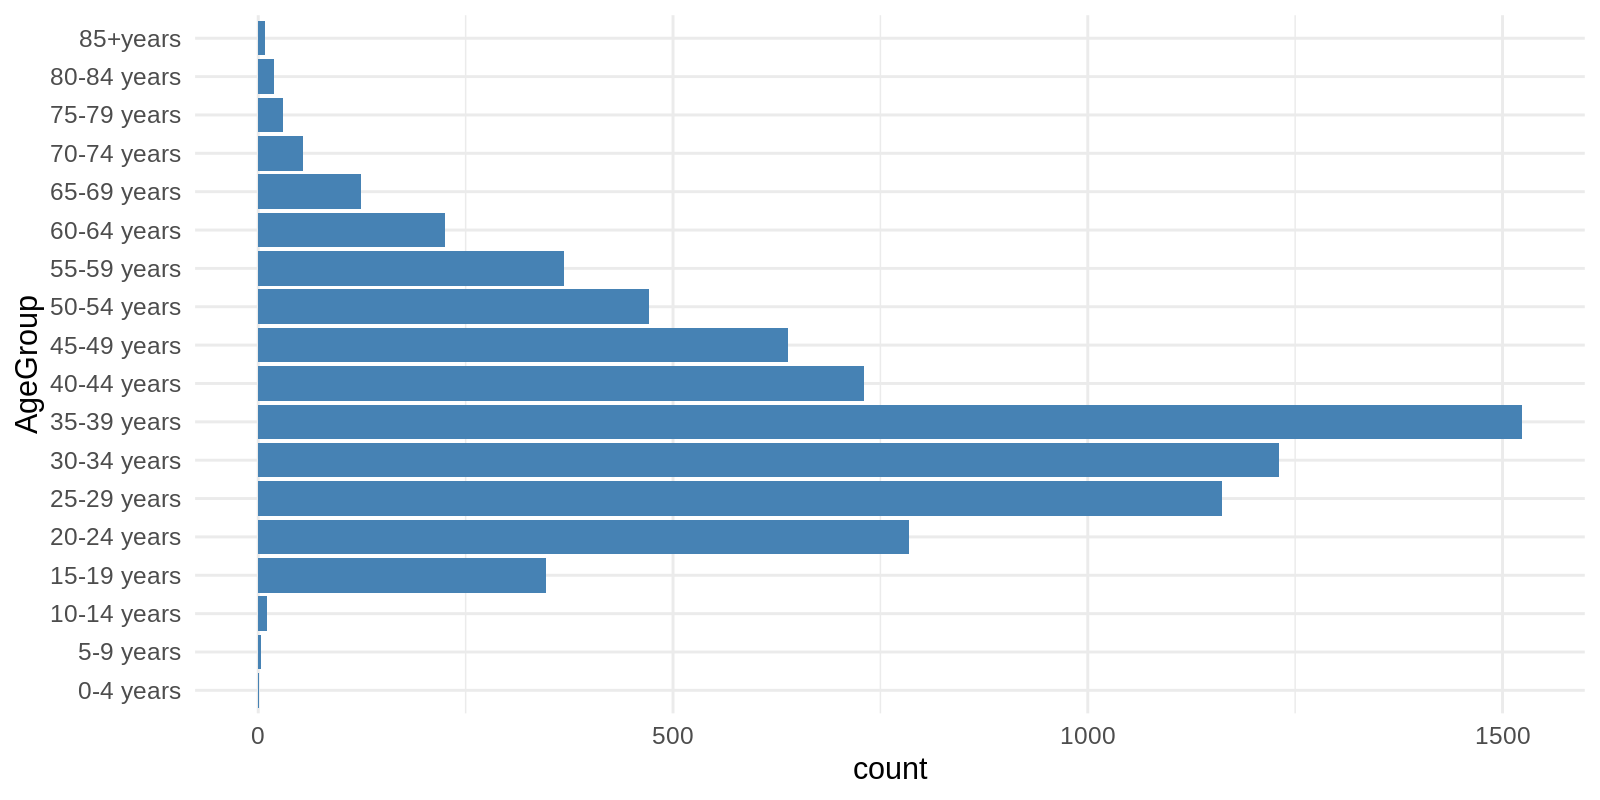

In [153]:
p4 <- ggplot(df, aes(y = AgeGroup))+
  geom_bar(fill="steelblue")+
  theme_minimal()
p4

> Victims who got killed were mostly from the age group of 20 years to 44 years.

> The highest number of victims were from the age group of 35 - 39 Years.

# Maximum Age of a Victim

In [155]:
max(df$age)

[1] 92

# Minimum Age of a Victim

In [156]:
min(df$age)

[1] 2

# Victims Killed by State

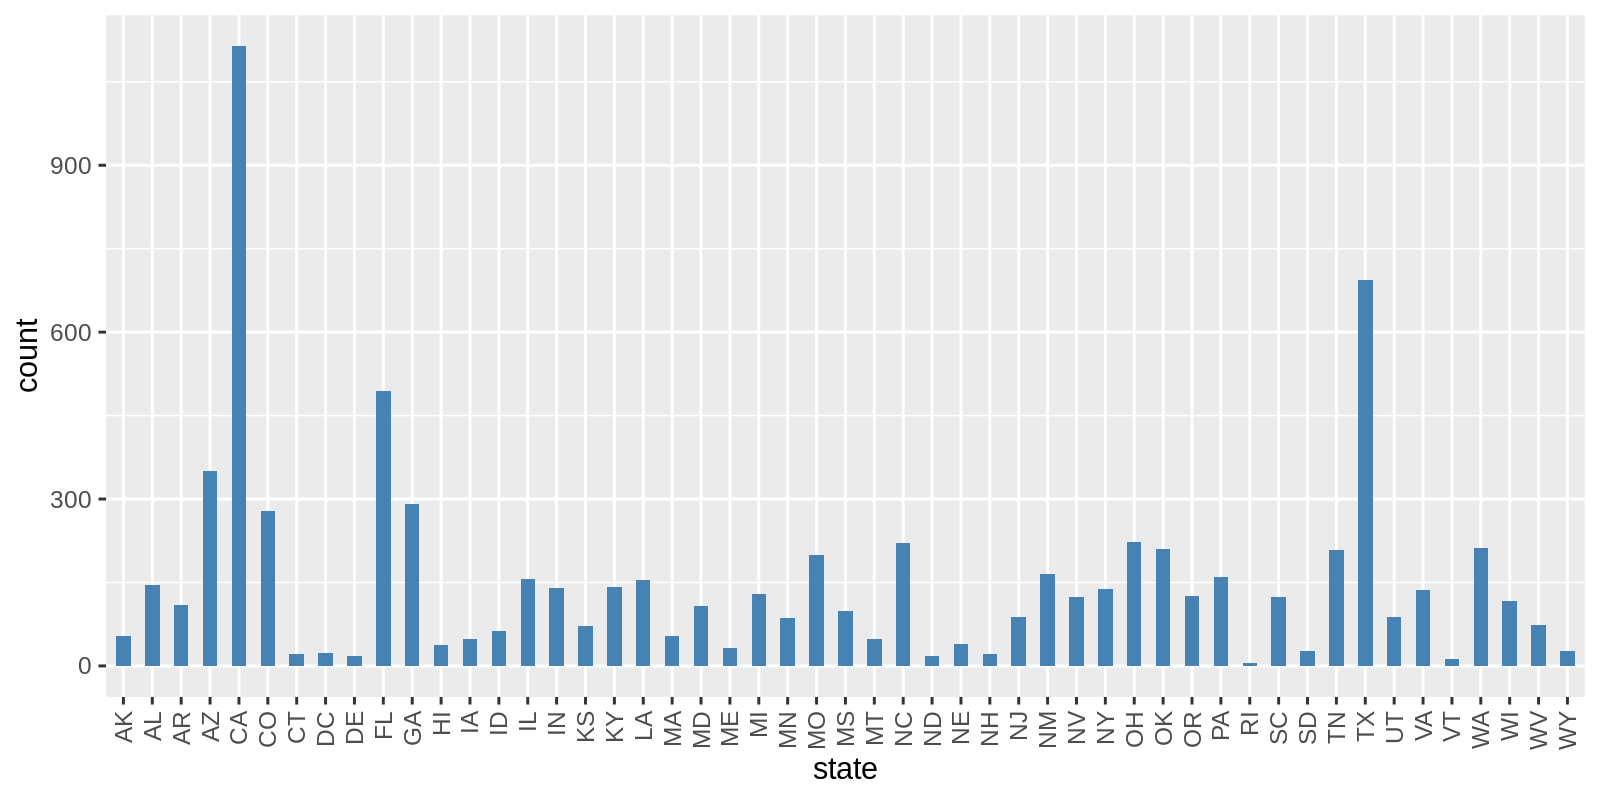

In [182]:
p5 <- ggplot(df, aes(x = state)) +
      geom_bar(fill="steelblue", width = 0.50) +
      labs(y="count") +
      theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))

p5

# Weapons used by People who were Killed

In [194]:
unique(df$armed)

[1] "gun"                              "unarmed"                         
  [3] "toy weapon"                       "nail gun"                        
  [5] "knife"                            "Unknown"                         
  [7] "shovel"                           "vehicle"                         
  [9] "hammer"                           "hatchet"                         
 [11] "sword"                            "machete"                         
 [13] "box cutter"                       "undetermined"                    
 [15] "metal object"                     "screwdriver"                     
 [17] "lawn mower blade"                 "flagpole"                        
 [19] "guns and explosives"              "cordless drill"                  
 [21] "crossbow"                         "BB gun"                          
 [23] "metal pole"                       "Taser"                           
 [25] "metal pipe"                       "metal hand tool"                 
 [27] "blunt object"                     "metal stick"                     
 [29] "sharp object"                     "meat cleaver"                    
 [31] "carjack"                          "chain"                           
 [33] "contractor's level"               "railroad spikes"                 
 [35] "stapler"                          "beer bottle"                     
 [37] "unknown weapon"                   "binoculars"                      
 [39] "pellet gun"                       "bean-bag gun"                    
 [41] "baseball bat and fireplace poker" "straight edge razor"             
 [43] "gun and knife"                    "ax"                              
 [45] "brick"                            "baseball bat"                    
 [47] "hand torch"                       "chain saw"                       
 [49] "garden tool"                      "pair of scissors"                
 [51] "pole"                             "pick-axe"                        
 [53] "flashlight"                       "baton"                           
 [55] "spear"                            "chair"                           
 [57] "pitchfork"                        "hatchet and gun"                 
 [59] "rock"                             "piece of wood"                   
 [61] "pipe"                             "glass shard"                     
 [63] "motorcycle"                       "pepper spray"                    
 [65] "metal rake"                       "crowbar"                         
 [67] "oar"                              "machete and gun"                 
 [69] "tire iron"                        "air conditioner"                 
 [71] "pole and knife"                   "baseball bat and bottle"         
 [73] "fireworks"                        "pen"                             
 [75] "chainsaw"                         "gun and sword"                   
 [77] "gun and car"                      "claimed to be armed"             
 [79] "incendiary device"                "samurai sword"                   
 [81] "bow and arrow"                    "gun and vehicle"                 
 [83] "vehicle and gun"                  "wrench"                          
 [85] "walking stick"                    "barstool"                        
 [87] "BB gun and vehicle"               "wasp spray"                      
 [89] "air pistol"                       "Airsoft pistol"                  
 [91] "baseball bat and knife"           "vehicle and machete"             
 [93] "ice pick"                         "car, knife and mace"             
 [95] "bottle"                           "gun and machete"                 
 [97] "microphone"                       "knife and vehicle"               
 [99] "machete and hammer"               "stake"                           
[101] "incendiary weapon"                "ax and machete"                  
[103] "hammer and garden tool"           "flare gun"                       
[105] "knife, hammer and gasoline can"

# Count of Unarmed people

In [196]:
sum(df$armed == 'unarmed')

[1] 456

In [197]:
sum(df$armed == 'Unknown')

[1] 209

# Count of People with Gun

In [199]:
sum(df$armed == 'gun')

[1] 4407

# Threat Level on the basis of Race

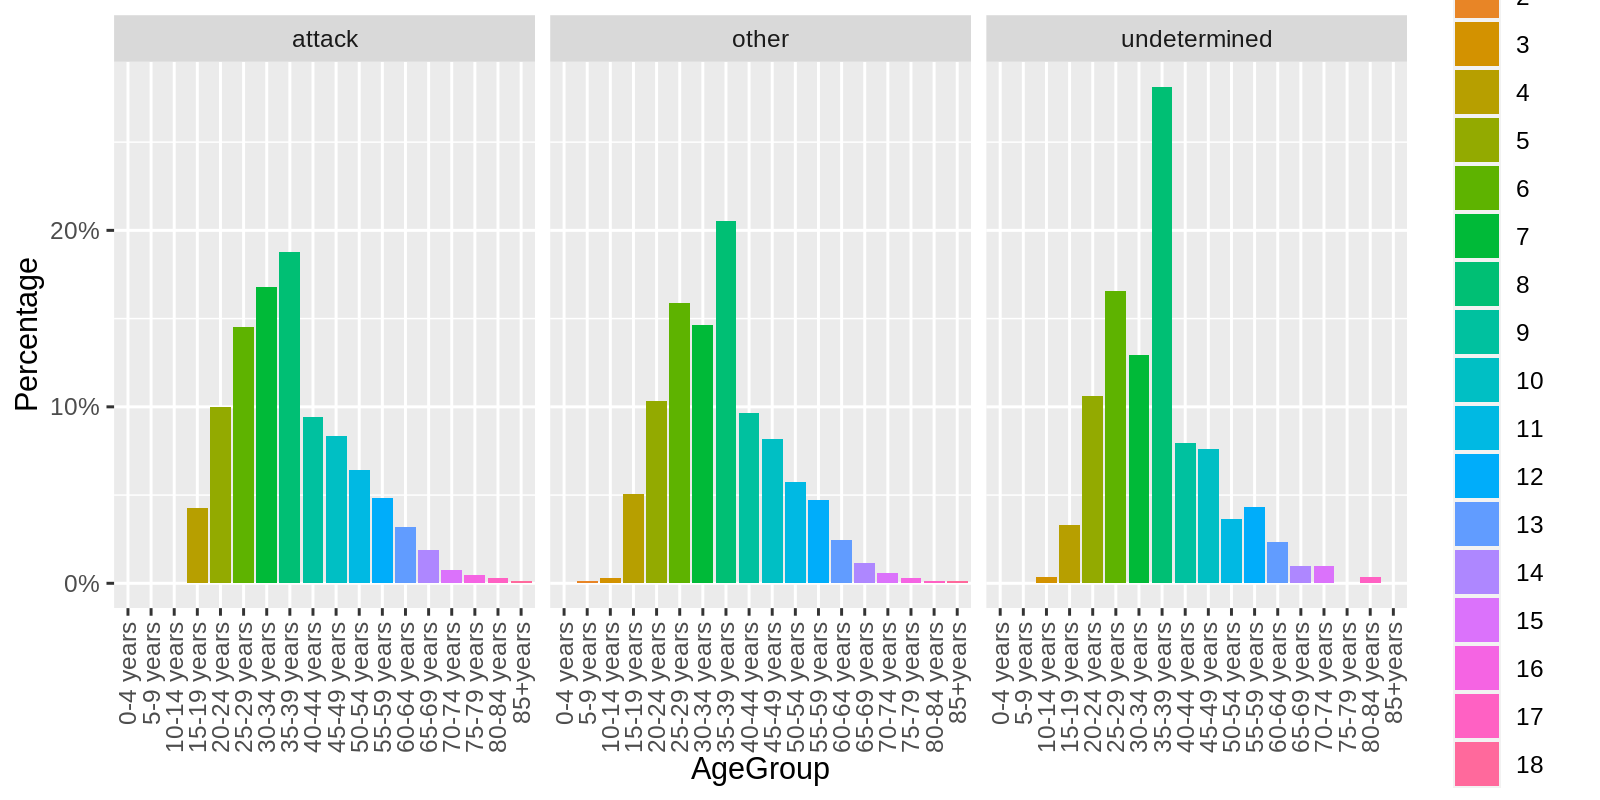

In [202]:
p6 <- ggplot(df, aes(AgeGroup, group = threat_level)) + 
          geom_bar(aes(y = ..prop.., fill = factor(..x..)), stat="count") + 
          scale_y_continuous(labels=scales::percent) +
          ylab("Percentage") +
          theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5)) +
          facet_grid(~threat_level)

p6